<a href="https://colab.research.google.com/github/Bast-aleja/Marketing_1/blob/main/Entrega_final_modulo_finanzas_Seguros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTACIÓN DE PAQUETES**

In [ ]:
##importar paquetes
import pandas as pd
import numpy as np
import random 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from io import StringIO
import pydotplus
from sklearn import tree
import pickle
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#importar datos 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**LECTURA BASE DE DATOS**

In [ ]:
# cargar bases
BD_Expuestos= pd.read_csv('/content/drive/MyDrive/ANALITICA3/BD_Expuestos_2.csv', sep=";")
BD_Sociodemografia= pd.read_csv('/content/drive/MyDrive/ANALITICA3/BD_Sociodemografia_2.csv' , encoding='latin-1', sep=";")
BD_Siniestros= pd.read_csv('/content/drive/MyDrive/ANALITICA3/DB_Siniestros_2.csv' , encoding='latin-1', sep=";")

**TRATAMIENTO BD EXPUESTOS**

In [ ]:
#Visualizar BD
BD_Expuestos.head(2)

Asegurado_Id  Poliza_Asegurado_Id FECHA_INICIO FECHA_CANCELACION  \
0      16286173            125696117   2018/01/01        2018/04/10   
1      11885152            141320760   2018/01/01               NaN   

    FECHA_FIN  
0  2018/04/10  
1  2019/12/31

In [ ]:
#Información general BD
BD_Expuestos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300900 entries, 0 to 300899
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Asegurado_Id         300900 non-null  int64 
 1   Poliza_Asegurado_Id  300900 non-null  int64 
 2   FECHA_INICIO         300900 non-null  object
 3   FECHA_CANCELACION    151963 non-null  object
 4   FECHA_FIN            300900 non-null  object
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


In [ ]:
#Analizar dimensión, tipos y nulos
print(BD_Expuestos.shape)
print('-------------------------------------------------')
print(BD_Expuestos.isnull().sum())
print('-------------------------------------------------')
print(BD_Expuestos.dtypes)
print('-------------------------------------------------')

(300900, 5)
-------------------------------------------------
Asegurado_Id                0
Poliza_Asegurado_Id         0
FECHA_INICIO                0
FECHA_CANCELACION      148937
FECHA_FIN                   0
dtype: int64
-------------------------------------------------
Asegurado_Id            int64
Poliza_Asegurado_Id     int64
FECHA_INICIO           object
FECHA_CANCELACION      object
FECHA_FIN              object
dtype: object
-------------------------------------------------


In [ ]:
#Cambiar algunos nombres 
BD_Expuestos= BD_Expuestos.rename(columns={'Asegurado_Id':'id_cliente', 'Poliza_Asegurado_Id':'cod_poliza'})

In [ ]:
#Cambiar a minusculas el nombre de las columnas
BD_Expuestos.columns = BD_Expuestos.columns.str.lower()
BD_Expuestos.columns

Index(['id_cliente', 'cod_poliza', 'fecha_inicio', 'fecha_cancelacion',
       'fecha_fin'],
      dtype='object')

In [ ]:
#Arreglar el tipo de dato de las columnas
BD_Expuestos=BD_Expuestos.convert_dtypes()
BD_Expuestos.dtypes

id_cliente            Int64
cod_poliza            Int64
fecha_inicio         string
fecha_cancelacion    string
fecha_fin            string
dtype: object

In [ ]:
#Calcular columna EXPO, partiendo de creación de la columna FI y FF
#Cambiar el tipo de dato de las fechas a datetime
BD_Expuestos['fecha_inicio'] = pd.to_datetime(BD_Expuestos['fecha_inicio']) 
BD_Expuestos['FI'] = pd.to_datetime(BD_Expuestos['fecha_inicio']) # FI
BD_Expuestos['fecha_cancelacion'] = pd.to_datetime(BD_Expuestos['fecha_cancelacion']) 
BD_Expuestos['fecha_fin'] = pd.to_datetime(BD_Expuestos['fecha_fin'])
BD_Expuestos['FF'] = BD_Expuestos[['fecha_cancelacion','fecha_fin']].min(axis=1) #FF
BD_Expuestos['EXPO'] = (BD_Expuestos['FF'] - BD_Expuestos['FI'])/ np.timedelta64(2, 'Y') # EXPO = ((ff-fi)/)
BD_Expuestos = BD_Expuestos.sort_values(['id_cliente', 'fecha_inicio'],
              ascending = [True, True])
BD_Expuestos

id_cliente  cod_poliza fecha_inicio fecha_cancelacion  fecha_fin  \
266073      738284    89612446   2018-01-01        2018-02-01 2018-02-01   
267387      738288    88146604   2018-01-01        2018-11-08 2018-11-08   
162796      738288   175992661   2018-11-08               NaT 2019-12-31   
99970       738294    89612649   2018-01-01        2019-12-31 2019-12-31   
152420      738303   120708179   2018-01-01               NaT 2019-12-31   
...            ...         ...          ...               ...        ...   
108906    58581939   168944085   2018-05-15               NaT 2019-12-31   
53059     58581989   132872337   2018-01-01               NaT 2019-12-31   
21750     58584529    96109296   2018-01-01        2018-09-01 2018-09-01   
110303    58584580   159465186   2018-01-01               NaT 2019-12-31   
164906    58584620    94495059   2018-01-01               NaT 2019-12-31   

               FI         FF      EXPO  
266073 2018-01-01 2018-02-01  0.042438  
267387 2018-01-01 2018-11-08  0.425745  
162796 2018-11-08 2019-12-31  0.572223  
99970  2018-01-01 2019-12-31  0.997967  
152420 2018-01-01 2019-12-31  0.997967  
...           ...        ...       ...  
108906 2018-05-15 2019-12-31  0.814527  
53059  2018-01-01 2019-12-31  0.997967  
21750  2018-01-01 2018-09-01  0.332656  
110303 2018-01-01 2019-12-31  0.997967  
164906 2018-01-01 2019-12-31  0.997967  

[300900 rows x 8 columns]

In [ ]:
BD_Expuestos.dtypes

id_cliente                    Int64
cod_poliza                    Int64
fecha_inicio         datetime64[ns]
fecha_cancelacion    datetime64[ns]
fecha_fin            datetime64[ns]
FI                   datetime64[ns]
FF                   datetime64[ns]
EXPO                        float64
dtype: object

**TRATAMIENTO BD SINIESTROS**

In [ ]:
#Ver información general de BD siniestros
BD_Siniestros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Mes_Pago            1048575 non-null  int64  
 1   Asegurado_Id        1048575 non-null  int64  
 2   Reclamacion         1048575 non-null  object 
 3   Diagnostico_Codigo  1048575 non-null  object 
 4   Diagnostico_Desc    1048575 non-null  object 
 5   Eventos             1048575 non-null  int64  
 6   Valor_Pagado        1048575 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 56.0+ MB


In [ ]:
#Ver columnas
BD_Siniestros.columns

Index(['Mes_Pago', 'Asegurado_Id', 'Reclamacion', 'Diagnostico_Codigo',
       'Diagnostico_Desc', 'Eventos', 'Valor_Pagado'],
      dtype='object')

In [ ]:
#Analizar dimensión, tipos y nulos
print(BD_Siniestros.shape)
print('-------------------------------------------------')
print(BD_Siniestros.isnull().sum())
print('-------------------------------------------------')
print(BD_Siniestros.dtypes)
print('-------------------------------------------------')

(1048575, 7)
-------------------------------------------------
Mes_Pago              0
Asegurado_Id          0
Reclamacion           0
Diagnostico_Codigo    0
Diagnostico_Desc      0
Eventos               0
Valor_Pagado          0
dtype: int64
-------------------------------------------------
Mes_Pago                int64
Asegurado_Id            int64
Reclamacion            object
Diagnostico_Codigo     object
Diagnostico_Desc       object
Eventos                 int64
Valor_Pagado          float64
dtype: object
-------------------------------------------------


In [ ]:
#Cambiar nombres
BD_Siniestros= BD_Siniestros.rename(columns={'Asegurado_Id':'id_cliente', 'Diagnostico_Codigo':'cod_diagnostico'})

In [ ]:
#Cambiar a el nombre de las columnas
BD_Siniestros.columns = BD_Siniestros.columns.str.lower()
BD_Siniestros.columns

Index(['mes_pago', 'id_cliente', 'reclamacion', 'cod_diagnostico',
       'diagnostico_desc', 'eventos', 'valor_pagado'],
      dtype='object')

In [ ]:
#Se arregla o convierte el tipo de dato
BD_Siniestros=BD_Siniestros.convert_dtypes()
BD_Siniestros.dtypes

mes_pago              Int64
id_cliente            Int64
reclamacion          string
cod_diagnostico      string
diagnostico_desc     string
eventos               Int64
valor_pagado        Float64
dtype: object

In [ ]:
#Se decide borrar la variable diagnostico_desc debido a que cod_diagnostico nos aporta la misma informaciòn y es más facil agruparlo
BD_Siniestros.drop(['diagnostico_desc'], axis=1)

mes_pago  id_cliente                                     reclamacion  \
0          201803     4834968                         EXAMENES DE DIAGNOSTICO   
1          201909    14915125                         EXAMENES DE DIAGNOSTICO   
2          201807    42959949                         EXAMENES DE DIAGNOSTICO   
3          201803    30540131                                CONSULTA EXTERNA   
4          201905    21442420                             LABORATORIO CLINICO   
...           ...         ...                                             ...   
1048570    201907     9822689                             LABORATORIO CLINICO   
1048571    201807     4806249              CIRUGIA AMBULATORIA POR ENFERMEDAD   
1048572    201902    10899044                                CONSULTA EXTERNA   
1048573    201808     3482153                                CONSULTA EXTERNA   
1048574    201805    38513672  TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD   

        cod_diagnostico  eventos  valor_pagado  
0                  Z011        1      111600.0  
1                     9        1       50468.0  
2                     9        1      610452.0  
3                     9        1       42160.0  
4                     9       18     617336.48  
...                 ...      ...           ...  
1048570               9        2     173448.72  
1048571            L732        1      496000.0  
1048572               9        1       24056.0  
1048573               9        1       80600.0  
1048574            G400        1     918528.76  

[1048575 rows x 6 columns]

In [ ]:
BD_Siniestros['cod_diagnostico'].unique()

<StringArray>
['Z011',    '9', 'S500', 'B360', 'N486', 'R688', 'M08X', 'E039', 'K35X',
 'Z017',
 ...
 'D892', 'M924', 'Y478', 'S157', 'Y835', 'F160', 'S747', 'Q79X', 'Z558',
 'L245']
Length: 4420, dtype: string

In [ ]:
#Al observar que los codigos se dividen por letras que representan su tipo de diagnostico se decide agruparlos

BD_Sinis_E=BD_Siniestros['cod_diagnostico'].to_excel("prueba.xlsx")


In [ ]:
#Al revisar los datos en excel comprobamos que la mayoria estan mal escritos pues tienen '9' como referencia por lo que se decide eliminar esta variable
BD_Siniestros.drop(['cod_diagnostico'], axis=1)

mes_pago  id_cliente                                     reclamacion  \
0          201803     4834968                         EXAMENES DE DIAGNOSTICO   
1          201909    14915125                         EXAMENES DE DIAGNOSTICO   
2          201807    42959949                         EXAMENES DE DIAGNOSTICO   
3          201803    30540131                                CONSULTA EXTERNA   
4          201905    21442420                             LABORATORIO CLINICO   
...           ...         ...                                             ...   
1048570    201907     9822689                             LABORATORIO CLINICO   
1048571    201807     4806249              CIRUGIA AMBULATORIA POR ENFERMEDAD   
1048572    201902    10899044                                CONSULTA EXTERNA   
1048573    201808     3482153                                CONSULTA EXTERNA   
1048574    201805    38513672  TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD   

                                          diagnostico_desc  eventos  \
0                         EXAMEN DE OÍDOS Y DE LA AUDICIÓN        1   
1                                    DIAGNÓSTICO PENDIENTE        1   
2                                    DIAGNÓSTICO PENDIENTE        1   
3                                    DIAGNÓSTICO PENDIENTE        1   
4                                    DIAGNÓSTICO PENDIENTE       18   
...                                                    ...      ...   
1048570                              DIAGNÓSTICO PENDIENTE        2   
1048571                            HIDRADENITIS SUPURATIVA        1   
1048572                              DIAGNÓSTICO PENDIENTE        1   
1048573                              DIAGNÓSTICO PENDIENTE        1   
1048574  EPILEPSIA Y SÍNDROMES EPILÉPTICOS IDIOPÁTICOS ...        1   

         valor_pagado  
0            111600.0  
1             50468.0  
2            610452.0  
3             42160.0  
4           617336.48  
...               ...  
1048570     173448.72  
1048571      496000.0  
1048572       24056.0  
1048573       80600.0  
1048574     918528.76  

[1048575 rows x 6 columns]

TRATAMIENTO BD DEMOGRAFIA

In [ ]:
#Ver información general BD demografia 
BD_Sociodemografia.info()
BD_Sociodemografia.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267312 entries, 0 to 267311
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Asegurado_Id        267312 non-null  int64 
 1   Sexo_Cd             267312 non-null  object
 2   FechaNacimiento     267312 non-null  object
 3   Regional            267311 non-null  object
 4   CANCER              267312 non-null  int64 
 5   EPOC                267312 non-null  int64 
 6   DIABETES            267312 non-null  int64 
 7   HIPERTENSION        267312 non-null  int64 
 8   ENF_CARDIOVASCULAR  267312 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 18.4+ MB


Asegurado_Id          267233
Sexo_Cd                    3
FechaNacimiento        29945
Regional                   6
CANCER                     2
EPOC                       2
DIABETES                   2
HIPERTENSION               2
ENF_CARDIOVASCULAR         2
dtype: int64

In [ ]:
#Ver columnas
BD_Sociodemografia.columns

Index(['Asegurado_Id', 'Sexo_Cd', 'FechaNacimiento', 'Regional', 'CANCER',
       'EPOC', 'DIABETES', 'HIPERTENSION', 'ENF_CARDIOVASCULAR'],
      dtype='object')

In [ ]:
#Cambiar nombres
BD_Sociodemografia= BD_Sociodemografia.rename(columns={'Asegurado_Id':'id_cliente', 'Sexo_Cd':'sexo', 'FechaNacimiento':'fecha_nacimiento'})

In [ ]:
#Cambiar a minusculas el nombre de las columnas 
BD_Sociodemografia.columns = BD_Sociodemografia.columns.str.lower()
BD_Sociodemografia.columns

Index(['id_cliente', 'sexo', 'fecha_nacimiento', 'regional', 'cancer', 'epoc',
       'diabetes', 'hipertension', 'enf_cardiovascular'],
      dtype='object')

In [ ]:
#Analizar dimensión, tipos y nulos
print(BD_Sociodemografia.shape)
print('-------------------------------------------------')
print(BD_Sociodemografia.isnull().sum())
print('-------------------------------------------------')
print(BD_Sociodemografia.dtypes)
print('-------------------------------------------------')

(267312, 9)
-------------------------------------------------
id_cliente            0
sexo                  0
fecha_nacimiento      0
regional              1
cancer                0
epoc                  0
diabetes              0
hipertension          0
enf_cardiovascular    0
dtype: int64
-------------------------------------------------
id_cliente             int64
sexo                  object
fecha_nacimiento      object
regional              object
cancer                 int64
epoc                   int64
diabetes               int64
hipertension           int64
enf_cardiovascular     int64
dtype: object
-------------------------------------------------


In [ ]:
#Se arregla el tipo de datos
BD_Sociodemografia=BD_Sociodemografia.convert_dtypes()
BD_Sociodemografia.dtypes

id_cliente             Int64
sexo                  string
fecha_nacimiento      string
regional              string
cancer                 Int64
epoc                   Int64
diabetes               Int64
hipertension           Int64
enf_cardiovascular     Int64
dtype: object

In [ ]:
#Depurar categoria sexo
BD_Sociodemografia['sexo'].value_counts()

F     145430
M     121877
-1         5
Name: sexo, dtype: Int64

In [ ]:
#Variable Sexo: cambiar "-1" por "F" (femenino) 
#Diccionario para poder remplazar 
dictionary ={
    '-1':'F'
}

In [ ]:
#Efectuar cambio de variable -1 por F
BD_Sociodemografia['sexo'].replace(dictionary, inplace=True)

In [ ]:
#Depurarar categoria Regional
#Ver las diferentes categorias
BD_Sociodemografia['regional'].value_counts()

REGIONAL CENTRO          127149
REGIONAL ANTIOQUIA        49722
REGIONAL OCCIDENTE        46180
REGIONAL NORTE            34845
REGIONAL EJE CAFETERO      9342
Sin Información              73
Name: regional, dtype: Int64

In [ ]:
#Hacer diccionario para remplazar categoria
dictionary ={
    'Sin Información':'regional'
}

In [ ]:
#Efectuar remplazo de variable sin identificación  por regional 
BD_Sociodemografia['regional'].replace(dictionary, inplace =True)

UNION DE TODAS LAS BASES DE DATOS

In [ ]:
#Se deja en la base expuestos un unico registro y su exposición
BD_Expuestos=BD_Expuestos.groupby(['id_cliente'],as_index=False).agg({'FI':'min','FF':'max'})
BD_Expuestos['EXPO']=(BD_Expuestos['FF']-BD_Expuestos['FI'])/np.timedelta64(730, 'D')
BD_Expuestos=BD_Expuestos.groupby(['id_cliente','EXPO'],as_index=False).agg({'EXPO':'sum'})
BD_Expuestos

id_cliente      EXPO
0           738284  0.042466
1           738288  0.998630
2           738294  0.998630
3           738303  0.998630
4           738318  0.998630
...            ...       ...
267228    58581939  0.823288
267229    58581989  0.998630
267230    58584529  0.332877
267231    58584580  0.998630
267232    58584620  0.998630

[267233 rows x 2 columns]

In [ ]:
BD_Expuestos['EXPO'].describe()

count    267233.000000
mean          0.762737
std           0.335655
min          -0.326027
25%           0.500000
50%           0.998630
75%           0.998630
max           0.998630
Name: EXPO, dtype: float64

In [ ]:
#Se borra el dato erroneo
print(BD_Expuestos[BD_Expuestos['EXPO']<0])
BD_Expuestos=BD_Expuestos.drop([254959],axis=0)

        id_cliente      EXPO
254959    51346104 -0.326027


In [ ]:
#Se unen las tres bases de datos por medio de id_cliente
union_exp = BD_Siniestros.set_index('id_cliente').join(BD_Sociodemografia.set_index('id_cliente'), on='id_cliente')
union_exp_prueba= BD_Expuestos.set_index('id_cliente').join(union_exp, on='id_cliente')
union_exp_prueba.head(2)

EXPO  mes_pago             reclamacion cod_diagnostico  \
id_cliente                                                               
738284      0.042466    201801        CONSULTA EXTERNA               9   
738284      0.042466    201802  FISIOTERAPIA ILIMITADA               9   

                 diagnostico_desc  eventos  valor_pagado sexo  \
id_cliente                                                      
738284      DIAGNÓSTICO PENDIENTE        1       66960.0    M   
738284      DIAGNÓSTICO PENDIENTE        2       42656.0    M   

           fecha_nacimiento         regional  cancer  epoc  diabetes  \
id_cliente                                                             
738284           18/11/1967  REGIONAL CENTRO       0     0         0   
738284           18/11/1967  REGIONAL CENTRO       0     0         0   

            hipertension  enf_cardiovascular  
id_cliente                                    
738284                 0                   0  
738284                 0                   0

In [ ]:
#Ver columnas de la base de datos final
union_exp_prueba.columns

Index(['EXPO', 'mes_pago', 'reclamacion', 'cod_diagnostico',
       'diagnostico_desc', 'eventos', 'valor_pagado', 'sexo',
       'fecha_nacimiento', 'regional', 'cancer', 'epoc', 'diabetes',
       'hipertension', 'enf_cardiovascular'],
      dtype='object')

In [ ]:
union_exp

mes_pago                                     reclamacion  \
id_cliente                                                              
4834968    2018-01-01                         EXAMENES DE DIAGNOSTICO   
14915125   2019-01-01                         EXAMENES DE DIAGNOSTICO   
42959949   2018-01-01                         EXAMENES DE DIAGNOSTICO   
30540131   2018-01-01                                CONSULTA EXTERNA   
21442420   2019-01-01                             LABORATORIO CLINICO   
...               ...                                             ...   
9822689    2019-01-01                             LABORATORIO CLINICO   
4806249    2018-01-01              CIRUGIA AMBULATORIA POR ENFERMEDAD   
10899044   2019-01-01                                CONSULTA EXTERNA   
3482153    2018-01-01                                CONSULTA EXTERNA   
38513672   2018-01-01  TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD   

           cod_diagnostico                                   diagnostico_desc  \
id_cliente                                                                      
4834968               Z011                   EXAMEN DE OÍDOS Y DE LA AUDICIÓN   
14915125                 9                              DIAGNÓSTICO PENDIENTE   
42959949                 9                              DIAGNÓSTICO PENDIENTE   
30540131                 9                              DIAGNÓSTICO PENDIENTE   
21442420                 9                              DIAGNÓSTICO PENDIENTE   
...                    ...                                                ...   
9822689                  9                              DIAGNÓSTICO PENDIENTE   
4806249               L732                            HIDRADENITIS SUPURATIVA   
10899044                 9                              DIAGNÓSTICO PENDIENTE   
3482153                  9                              DIAGNÓSTICO PENDIENTE   
38513672              G400  EPILEPSIA Y SÍNDROMES EPILÉPTICOS IDIOPÁTICOS ...   

            eventos  valor_pagado  sexo fecha_nacimiento  regional  cancer  \
id_cliente                                                                   
4834968           1      111600.0     1       1969-10-30         1       0   
14915125          1       50468.0     0       1983-03-26         1       0   
42959949          1      610452.0     0       1987-12-03         1       0   
30540131          1       42160.0     0       1979-09-26         1       0   
21442420         18     617336.48     0       1991-06-01         1       0   
...             ...           ...   ...              ...       ...     ...   
9822689           2     173448.72     1       1969-06-24         0       0   
4806249           1      496000.0     0       1960-12-05         1       0   
10899044          1       24056.0     0       1980-08-29         4       0   
3482153           1       80600.0     0       1944-04-25         1       0   
38513672          1     918528.76     0       2009-01-16         1       0   

            epoc  diabetes  hipertension  enf_cardiovascular       edad  
id_cliente                                                               
4834968        0         0             1                   0  48.173474  
14915125       0         0             0                   0  35.770755  
42959949       0         0             0                   0  30.081384  
30540131       0         0             0                   0  38.267726  
21442420       0         0             0                   0  27.587151  
...          ...       ...           ...                 ...        ...  
9822689        0         0             0                   0  49.523262  
4806249        1         1             0                   0  57.074409  
10899044       0         0             0                   0  38.341650  
3482153        0         0             1                   0  73.688029  
38513672       0         0             0                   0   8.958432  

[1048823 rows x 15 columns]

In [ ]:
#Agregar edad a union_exp_prueba y categorizar columna sexo y regional
union_exp_string_columns= ['sexo','regional']
union_exp["sexo"] = union_exp["sexo"].astype('category')
union_exp["regional"] = union_exp["regional"].astype('category')
union_exp["sexo"] = union_exp["sexo"].cat.codes
union_exp["regional"] = union_exp["regional"].cat.codes
union_exp = union_exp.convert_dtypes()
union_exp_prueba = union_exp
union_exp_prueba['mes_pago'] = pd.to_datetime(union_exp_prueba['mes_pago'].map(lambda x: str(x)[:-2]))
union_exp_prueba['fecha_nacimiento']= pd.to_datetime(union_exp_prueba['fecha_nacimiento'])
union_exp_prueba['edad'] = (union_exp_prueba['mes_pago'] - union_exp_prueba['fecha_nacimiento'])/ np.timedelta64(1, 'Y')
union_exp_prueba = union_exp_prueba.drop(['mes_pago','fecha_nacimiento'], axis=1)
union_exp_prueba

In [ ]:
# Crear tabla union_all_pd 
union_exp_string_columns= ['sexo','regional']

union_all_pd = union_exp
union_all_pd['mes_pago'] = pd.to_datetime(union_all_pd['mes_pago'])
union_all_pd['fecha_nacimiento']= pd.to_datetime(union_all_pd['fecha_nacimiento'])
union_all_pd['edad'] = (union_all_pd['mes_pago'] - union_all_pd['fecha_nacimiento'])/ np.timedelta64(1, 'Y')
union_all_pd = union_all_pd.drop(['diagnostico_desc','mes_pago','fecha_nacimiento'], axis=1)
union_all_pd 

reclamacion cod_diagnostico  \
id_cliente                                                                   
4834968                            EXAMENES DE DIAGNOSTICO            Z011   
14915125                           EXAMENES DE DIAGNOSTICO               9   
42959949                           EXAMENES DE DIAGNOSTICO               9   
30540131                                  CONSULTA EXTERNA               9   
21442420                               LABORATORIO CLINICO               9   
...                                                    ...             ...   
9822689                                LABORATORIO CLINICO               9   
4806249                 CIRUGIA AMBULATORIA POR ENFERMEDAD            L732   
10899044                                  CONSULTA EXTERNA               9   
3482153                                   CONSULTA EXTERNA               9   
38513672    TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD            G400   

            eventos  valor_pagado  sexo  regional  cancer  epoc  diabetes  \
id_cliente                                                                  
4834968           1      111600.0     1         1       0     0         0   
14915125          1       50468.0     0         1       0     0         0   
42959949          1      610452.0     0         1       0     0         0   
30540131          1       42160.0     0         1       0     0         0   
21442420         18     617336.48     0         1       0     0         0   
...             ...           ...   ...       ...     ...   ...       ...   
9822689           2     173448.72     1         0       0     0         0   
4806249           1      496000.0     0         1       0     1         1   
10899044          1       24056.0     0         4       0     0         0   
3482153           1       80600.0     0         1       0     0         0   
38513672          1     918528.76     0         1       0     0         0   

            hipertension  enf_cardiovascular       edad  
id_cliente                                               
4834968                1                   0  48.173474  
14915125               0                   0  35.770755  
42959949               0                   0  30.081384  
30540131               0                   0  38.267726  
21442420               0                   0  27.587151  
...                  ...                 ...        ...  
9822689                0                   0  49.523262  
4806249                0                   0  57.074409  
10899044               0                   0  38.341650  
3482153                1                   0  73.688029  
38513672               0                   0   8.958432  

[1048823 rows x 12 columns]

In [ ]:
union_all_pd['regional'].value_counts()

 1    555184
 4    171860
 0    167363
 3    124869
 2     28592
-1       783
 5       172
Name: regional, dtype: Int64

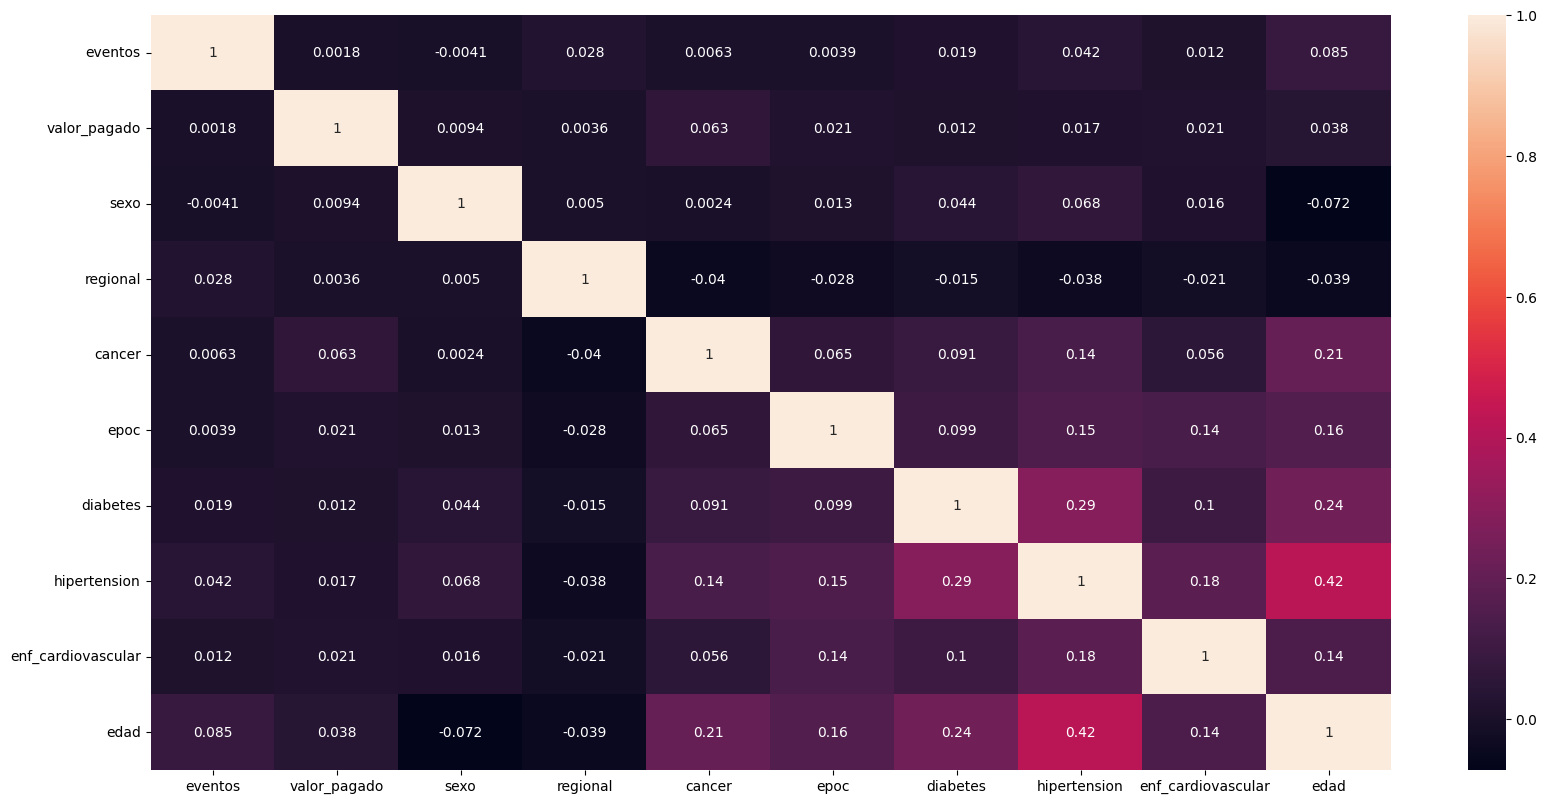

In [ ]:
import seaborn as sns
from matplotlib.pyplot import figure
figure(figsize=(20, 10), dpi=100);
sns.heatmap(union_all_pd.corr(), annot = True);

In [ ]:
#Matriz de correlaciones de la base de datos grande 
cor = union_exp_prueba.corr()
cor_target = abs(cor["valor_pagado"])
relevant_features = cor_target[cor_target>0] ## DEFINIR ESTA VARIABLE
relevant_features_columns = list(relevant_features.index)

cor_relevante_features = union_exp_prueba[relevant_features_columns].corr()
union_all_factorized_features = union_exp_prueba[relevant_features_columns]
relevant_features

eventos               0.001766
valor_pagado          1.000000
sexo                  0.009431
regional              0.003591
cancer                0.063381
epoc                  0.020864
diabetes              0.012031
hipertension          0.017263
enf_cardiovascular    0.020567
edad                  0.038431
Name: valor_pagado, dtype: float64

In [ ]:
# El vector Target será valor_pago. Este dependerá del tipo de reclamación, cabe destacar que existen 39 tipos de reclamos, por ende,
# se crearan dataframes que  agrupen ciertas categorias. Esta agrupación se dará teniedo encuenta la cantidad de veces que se han registrado 
# las determinadas reclamaciones.
#DF1: CONSULTA EXTERNA - EXAMENES DE DIAGNOSTICO - LABORATORIO CLINICO - CONSULTA DE URGENCIAS
#DF2: CIRUGIA AMBULATORIA POR ENFERMEDAD - TRATAMIENTOS ESPECIFICOS - TRATAMIENTO MEDICO AMBULATORIO POR ACCIDENTES - CONSULTAS PRENATALES 
#DF3: ANEXO EXEQUIAL - TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERMEDAD CONGENITA - ANEXO EXEQUIAL
union_exp_prueba['reclamacion'].value_counts()

CONSULTA EXTERNA                                                   398070
EXAMENES DE DIAGNOSTICO                                            220175
LABORATORIO CLINICO                                                165185
CONSULTA DE URGENCIAS                                              116185
CIRUGIA AMBULATORIA POR ENFERMEDAD                                  33498
FISIOTERAPIA ILIMITADA                                              31101
TRATAMIENTOS ESPECIFICOS                                            15695
TRATAMIENTO MEDICO AMBULATORIO POR ACCIDENTES                       12451
CONSULTAS PRENATALES                                                10714
TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD                       8969
TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERMEDAD                   6457
CIRUGIA AMBULATORIA POR ACCIDENTE                                    5535
TRATAMIENTO AMBULATORIO POR CANCER                                   4749
PAMD                                  

Depuració Base de datos general grande

In [ ]:
#Verificación de datos nulos 
union_exp_prueba.isnull().sum()

reclamacion             0
cod_diagnostico         0
diagnostico_desc        0
eventos                 0
valor_pagado            0
sexo                    0
regional                0
cancer                781
epoc                  781
diabetes              781
hipertension          781
enf_cardiovascular    781
edad                  781
dtype: int64

 

---
debido a que todos tienen la misma cantidad de datos nulos y es un tipo de
dato dificil de reemplazar o predecir se decide eliminar estas filas que no representan gran porcentaje de la base


In [ ]:
union_exp_prueba = union_exp_prueba[union_exp_prueba['cancer'].notna()]


In [ ]:
union_exp_prueba

reclamacion cod_diagnostico  \
id_cliente                                                                   
4834968                            EXAMENES DE DIAGNOSTICO            Z011   
14915125                           EXAMENES DE DIAGNOSTICO               9   
42959949                           EXAMENES DE DIAGNOSTICO               9   
30540131                                  CONSULTA EXTERNA               9   
21442420                               LABORATORIO CLINICO               9   
...                                                    ...             ...   
9822689                                LABORATORIO CLINICO               9   
4806249                 CIRUGIA AMBULATORIA POR ENFERMEDAD            L732   
10899044                                  CONSULTA EXTERNA               9   
3482153                                   CONSULTA EXTERNA               9   
38513672    TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD            G400   

                                             diagnostico_desc  eventos  \
id_cliente                                                               
4834968                      EXAMEN DE OÍDOS Y DE LA AUDICIÓN        1   
14915125                                DIAGNÓSTICO PENDIENTE        1   
42959949                                DIAGNÓSTICO PENDIENTE        1   
30540131                                DIAGNÓSTICO PENDIENTE        1   
21442420                                DIAGNÓSTICO PENDIENTE       18   
...                                                       ...      ...   
9822689                                 DIAGNÓSTICO PENDIENTE        2   
4806249                               HIDRADENITIS SUPURATIVA        1   
10899044                                DIAGNÓSTICO PENDIENTE        1   
3482153                                 DIAGNÓSTICO PENDIENTE        1   
38513672    EPILEPSIA Y SÍNDROMES EPILÉPTICOS IDIOPÁTICOS ...        1   

            valor_pagado  sexo  regional  cancer  epoc  diabetes  \
id_cliente                                                         
4834968         111600.0     1         1       0     0         0   
14915125         50468.0     0         1       0     0         0   
42959949        610452.0     0         1       0     0         0   
30540131         42160.0     0         1       0     0         0   
21442420       617336.48     0         1       0     0         0   
...                  ...   ...       ...     ...   ...       ...   
9822689        173448.72     1         0       0     0         0   
4806249         496000.0     0         1       0     1         1   
10899044         24056.0     0         4       0     0         0   
3482153          80600.0     0         1       0     0         0   
38513672       918528.76     0         1       0     0         0   

            hipertension  enf_cardiovascular       edad  
id_cliente                                               
4834968                1                   0  48.173474  
14915125               0                   0  35.770755  
42959949               0                   0  30.081384  
30540131               0                   0  38.267726  
21442420               0                   0  27.587151  
...                  ...                 ...        ...  
9822689                0                   0  49.523262  
4806249                0                   0  57.074409  
10899044               0                   0  38.341650  
3482153                1                   0  73.688029  
38513672               0                   0   8.958432  

[1048042 rows x 13 columns]

CREAR DF's 

In [ ]:
#Crear DF1: CONSULTA EXTERNA - EXAMENES DE DIAGNOSTICO - LABORATORIO CLINICO - CONSULTA DE URGENCIAS
options_DF1 = ['CONSULTA EXTERNA', 'EXAMENES DE DIAGNOSTICO','LABORATORIO CLINICO','CONSULTA DE URGENCIAS'] 
DF1 = union_exp_prueba.loc[union_exp_prueba['reclamacion'].isin(options_DF1)]

In [ ]:
#Crear DF2: CIRUGIA AMBULATORIA POR ENFERMEDAD - TRATAMIENTOS ESPECIFICOS - TRATAMIENTO MEDICO AMBULATORIO POR ACCIDENTES - CONSULTAS PRENATALES 
options_DF2 = ['CIRUGIA AMBULATORIA POR ENFERMEDAD', 'TRATAMIENTOS ESPECIFICOS','TRATAMIENTO MEDICO AMBULATORIO POR ACCIDENTES','CONSULTAS PRENATALES'] 
DF2 = union_exp_prueba.loc[union_exp_prueba['reclamacion'].isin(options_DF2)]

In [ ]:
#Crear DF3: ANEXO EXEQUIAL - TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERMEDAD CONGENITA - ANEXO EXEQUIAL- TRATAMIENTO HOSPITALARIO POR TRASPLANTES 
options_DF3 = ['ANEXO EXEQUIAL', 'TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERMEDAD CONGENITA','ANEXO EXEQUIALS','TRATAMIENTO HOSPITALARIO POR TRASPLANTES'] 
DF3 = union_exp_prueba.loc[union_exp_prueba['reclamacion'].isin(options_DF3)]

DEPURACIÓN DE LOS DF

Depuración DF2

In [ ]:
DF2.columns

Index(['reclamacion', 'cod_diagnostico', 'diagnostico_desc', 'eventos',
       'valor_pagado', 'sexo', 'regional', 'cancer', 'epoc', 'diabetes',
       'hipertension', 'enf_cardiovascular', 'edad'],
      dtype='object')

In [ ]:
#Eliminar vector target
DF2.drop(['valor_pagado', 'reclamacion', 'cod_diagnostico'], axis=1, inplace=True)

In [ ]:
DF2.isnull().sum()

diagnostico_desc      0
eventos               0
sexo                  0
regional              0
cancer                0
epoc                  0
diabetes              0
hipertension          0
enf_cardiovascular    0
edad                  0
dtype: int64

SELECCIÓN DEL MODELO

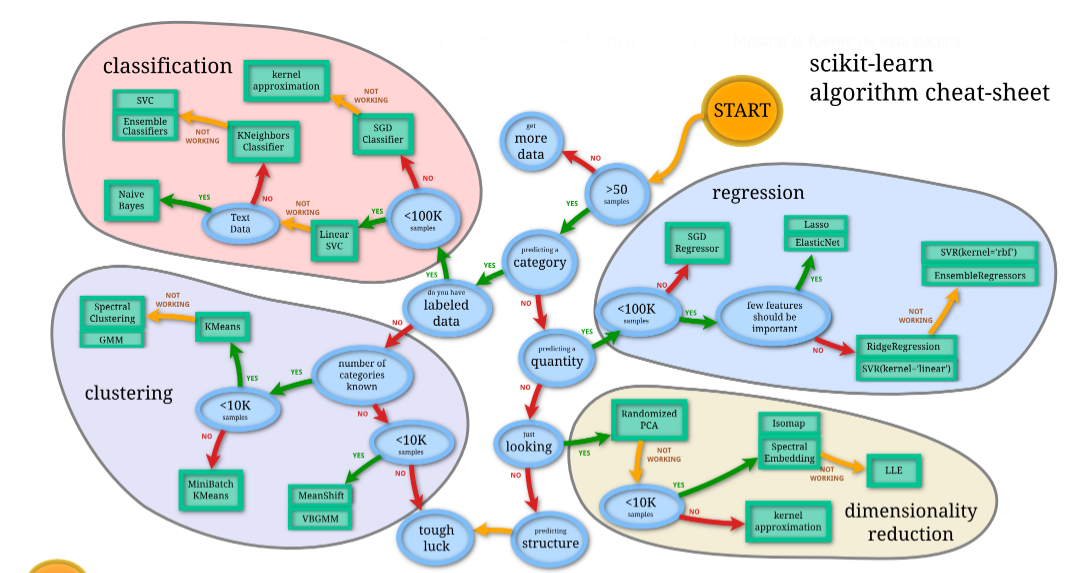

In [ ]:
DF2.shape #(SGD_regressor, arbol, regresión)

(72293, 10)

Selección de Features

In [ ]:
#Definición de variables para los modelos DF1
x_DF1 = DF1
y_Df1 = union_exp_prueba.loc[union_exp_prueba['reclamacion'].isin(options_DF1)]['valor_pagado']

In [ ]:
#Definición de variables para los modelos DF2
x_DF2 = DF2
y_Df2 = union_exp_prueba.loc[union_exp_prueba['reclamacion'].isin(options_DF2)]['valor_pagado'].to_frame()

In [ ]:
#Definición de variables para los modelos DF3
x_DF3 = DF3
y_Df3 = union_exp_prueba.loc[union_exp_prueba['reclamacion'].isin(options_DF3)]['valor_pagado']

Se decide probar una base de datos(df2)que no tenga tantos datos para saber el tiempo de ejecución del modelo y poder desarrollarlo para las otras bases

**BASE DE DATOS 2**

In [ ]:
import sklearn.linear_model as sl
import sklearn.feature_selection as sf

In [ ]:
x_DF2=x_DF2.drop(['diagnostico_desc'], axis=1)

In [ ]:
modelo = sl.LinearRegression()
rfe = sf.RFE(modelo, n_features_to_select=5) #se tomaran 5 variables de las 9 disponibles
fit = rfe.fit(x_DF2,y_Df2)

print('Nro. Features: ', fit.n_features_)
print('Features Seleccionados: ', fit.support_)
print('Rankig de features: ', fit.ranking_)

Nro. Features:  5
Features Seleccionados:  [ True  True False  True False  True  True False False]
Rankig de features:  [1 1 2 1 4 1 1 3 5]


In [ ]:
#Feature Importance
X = x_DF2[:2000]
Y = y_Df2[:2000].astype(int)
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(X,Y)
print(modelo.feature_importances_)
importances = modelo.feature_importances_ 

idx = np.arange(0, X.shape[1]) 
features_to_keep = idx[importances > np.mean(importances)] 


x_feature_selected = X.iloc[:,features_to_keep]
print(features_to_keep.shape)
print(list(x_feature_selected))
data_tuples = list(zip(X.columns,importances))
importance_df = pd.DataFrame(data_tuples, columns=['Columns','Importances'])
importance_df

[0.02314307 0.00862223 0.04303323 0.01191203 0.00697437 0.0075702
 0.00839924 0.00573488 0.88461075]
(1,)
['edad']


Columns  Importances
0             eventos     0.023143
1                sexo     0.008622
2            regional     0.043033
3              cancer     0.011912
4                epoc     0.006974
5            diabetes     0.007570
6        hipertension     0.008399
7  enf_cardiovascular     0.005735
8                edad     0.884611

**LOS FEATURES SELECCIONADOS SON**



1.   Eventos
2.   Sexo
3.   Diabetes
4.   Hipertención
5.   Cancer



In [ ]:
x_DF21 = x_DF2.drop(['regional','epoc', 'enf_cardiovascular',	'edad'],axis=1).values

In [ ]:
import sklearn.model_selection as skm
p= 0.33
semilla = 6

Xentrena, Xprueba, Yentrena, Yprueba = skm.train_test_split(x_DF21,y_Df2,test_size=p, random_state=semilla)

In [ ]:
#Crear modelo
modelo = sl.LinearRegression()

#Entrenamiento de modelo
modelo.fit(Xentrena, Yentrena)

#Pruebas del modelo

modelo.score(Xprueba, Yprueba)

0.013507208642833057

In [ ]:
#Kfold validation
from sklearn.model_selection import KFold
modelo2 = sl.LinearRegression()
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
test= skm.cross_val_score(modelo2,x_DF21,y_Df2,cv=kfold)

test.mean()

0.013474980528845392

In [ ]:
#metricas de precision
# Mean Absolute Error
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
score = 'neg_mean_absolute_error'
model5 = sl.LinearRegression()
resultado = skm.cross_val_score(model5,x_DF21,y_Df2,cv=kfold,scoring=score)
print("MAE: ",resultado.mean()*-1)
# R2
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
score = 'r2'
model6 = sl.LinearRegression()
resultado = skm.cross_val_score(model6,x_DF21,y_Df2,cv=kfold,scoring=score)
print("R2: ",resultado.mean())

MAE:  1053645.6283994624
R2:  0.013474980528845392


In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

regr.fit(x_DF2,y_Df2)

print("Intercept:", regr.intercept_)
print("R^2:", regr.score(x_DF2,y_Df2))

Intercept: [581986.10258276]
R^2: 0.02009210839824882


**RED NEURONAL**

In [ ]:
#Seleccion Features
#Recursive Feature Elimination
import sklearn.linear_model as sl
from sklearn.neural_network import MLPRegressor
modelo = MLPRegressor(random_state=1, max_iter=500).fit(x_DF2,y_Df2)
rfe = sf.RFE(modelo, n_features_to_select=5)


print('Nro. Features: ', fit.n_features_)
print('Features Seleccionados: ', fit.support_)
print('Rankig de features: ', fit.ranking_)

Nro. Features:  5
Features Seleccionados:  [False  True  True  True False False  True False  True]
Rankig de features:  [5 1 1 1 4 2 1 3 1]


In [ ]:
#Separar conjuntos de entrenamiento y prueba
import sklearn.model_selection as skm
p= 0.33
semilla = 6

Xentrena, Xprueba, Yentrena, Yprueba = skm.train_test_split(x_DF2,y_Df2,test_size=p, random_state=semilla)

#Crear modelo

model = MLPRegressor(activation="logistic", solver='sgd', random_state=1, max_iter=500)

#Entrenamiento de modelo
model.fit(Xentrena, Yentrena)

#Pruebas del modelo

model.score(Xprueba, Yprueba)


In [ ]:
#Kfold validation
model2 = MLPRegressor(activation="logistic", solver='sgd', random_state=1, max_iter=2000)
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
test= skm.cross_val_score(model2,x_DF2,y_Df2,cv=kfold)

print('K-fold:', test.mean())

#Repeated Random Test-Train Splits
kfold = skm.ShuffleSplit(n_splits=10, test_size=p, random_state=semilla)
model4 = MLPRegressor(activation="logistic", solver='sgd', random_state=1, max_iter=2000)
test = skm.cross_val_score(model4, x_DF2,y_Df2,cv=kfold)

print('Test-Train Splits:', test.mean())

#Metricas de precision

# Mean Absolute Error
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
score = 'neg_mean_absolute_error'
model5 = MLPRegressor(activation="logistic", solver='sgd', random_state=1, max_iter=2000)
resultado = skm.cross_val_score(model5,x_DF2,y_Df2,cv=kfold,scoring=score)
print("MAE: ",resultado.mean()*-1)

# R2
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
score = 'r2'
model6 = MLPRegressor(activation="logistic", solver='sgd', random_state=1, max_iter=2000)
resultado = skm.cross_val_score(model6,x_DF2,y_Df2,cv=kfold,scoring=score)
print("R2: ",resultado.mean()*100*-1)

Debido al tiempo que toma de ejecución las redes neuronales por la cantidad de datos de las bases, se decide hacer las otras dos bases por medio de la regresion lineal unicamente

**BASE DE DATOS 1**

In [ ]:
x_DF1

In [ ]:
x_DF1=x_DF1.drop(['reclamacion',	'cod_diagnostico',	'diagnostico_desc', 'valor_pagado' ], axis=1)

In [ ]:
x_DF1

eventos  sexo  regional  cancer  epoc  diabetes  hipertension  \
id_cliente                                                                  
4834968           1     1         1       0     0         0             1   
14915125          1     0         1       0     0         0             0   
42959949          1     0         1       0     0         0             0   
30540131          1     0         1       0     0         0             0   
21442420         18     0         1       0     0         0             0   
...             ...   ...       ...     ...   ...       ...           ...   
6052845           1     0         1       0     0         0             0   
41660293          1     0         0       0     0         0             0   
9822689           2     1         0       0     0         0             0   
10899044          1     0         4       0     0         0             0   
3482153           1     0         1       0     0         0             1   

            enf_cardiovascular       edad  
id_cliente                                 
4834968                      0  48.173474  
14915125                     0  35.770755  
42959949                     0  30.081384  
30540131                     0  38.267726  
21442420                     0  27.587151  
...                        ...        ...  
6052845                      0  61.329117  
41660293                     0  27.822611  
9822689                      0  49.523262  
10899044                     0  38.341650  
3482153                      0  73.688029  

[899153 rows x 9 columns]

In [ ]:
modelo = sl.LinearRegression()
rfe = sf.RFE(modelo, n_features_to_select=5) #se tomaran 5 variables de las 9 disponibles
fit = rfe.fit(x_DF1,y_Df1)

print('Nro. Features: ', fit.n_features_)
print('Features Seleccionados: ', fit.support_)
print('Rankig de features: ', fit.ranking_)

Nro. Features:  5
Features Seleccionados:  [ True False False  True  True  True  True False False]
Rankig de features:  [1 5 3 1 1 1 1 2 4]


**LOS FEATURES SELECCIONADOS SON**



1.   Eventos
2.   Cancer
3.   Diabetes
4.   Hipertención
5.   Epoc


In [ ]:
x_DF11 = x_DF1.drop(['sexo',	'regional',	 'enf_cardiovascular',	'edad'],axis=1).values

In [ ]:
import sklearn.model_selection as skm
p= 0.33
semilla = 6

Xentrena, Xprueba, Yentrena, Yprueba = skm.train_test_split(x_DF11,y_Df1,test_size=p, random_state=semilla)

In [ ]:
#Crear modelo
modelo = sl.LinearRegression()

#Entrenamiento de modelo
modelo.fit(Xentrena, Yentrena)

#Pruebas del modelo

modelo.score(Xprueba, Yprueba)

0.05114641914658513

In [ ]:
import sklearn.model_selection as skm
p= 0.33
semilla = 6

Xentrena, Xprueba, Yentrena, Yprueba = skm.train_test_split(x_DF11,y_Df1,test_size=p, random_state=semilla)

In [ ]:
#Crear modelo
modelo = sl.LinearRegression()

#Entrenamiento de modelo
modelo.fit(Xentrena, Yentrena)

#Pruebas del modelo

modelo.score(Xprueba, Yprueba)

0.05114641914658513

In [ ]:
#Kfold validation
from sklearn.model_selection import KFold
modelo2 = sl.LinearRegression()
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
test= skm.cross_val_score(modelo2,x_DF11,y_Df1,cv=kfold)

test.mean()

0.05141596104941524

In [ ]:
#metricas de precision
# Mean Absolute Error
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
score = 'neg_mean_absolute_error'
model5 = sl.LinearRegression()
resultado = skm.cross_val_score(model5,x_DF11,y_Df1,cv=kfold,scoring=score)
print("MAE: ",resultado.mean()*-1)
# R2
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
score = 'r2'
model6 = sl.LinearRegression()
resultado = skm.cross_val_score(model6,x_DF11,y_Df1,cv=kfold,scoring=score)
print("R2: ",resultado.mean())

MAE:  148310.20833771495
R2:  0.05141596104941524


In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

regr.fit(x_DF11,y_Df1)

print("Intercept:", regr.intercept_)
print("R^2:", regr.score(x_DF11,y_Df1))

Intercept: 139272.97626297004
R^2: 0.05137604948368202


**BASE DE DATOS 3**

In [ ]:
x_DF3

In [ ]:
x_DF3=x_DF3.drop(['reclamacion',	'cod_diagnostico',	'diagnostico_desc', 'valor_pagado' ], axis=1)

In [ ]:
x_DF3

In [ ]:
modelo = sl.LinearRegression()
rfe = sf.RFE(modelo, n_features_to_select=5) #se tomaran 5 variables de las 9 disponibles
fit = rfe.fit(x_DF3,y_Df3)

print('Nro. Features: ', fit.n_features_)
print('Features Seleccionados: ', fit.support_)
print('Rankig de features: ', fit.ranking_)

Nro. Features:  5
Features Seleccionados:  [False  True  True  True False False  True False  True]
Rankig de features:  [5 1 1 1 4 2 1 3 1]


**LOS FEATURES SELECCIONADOS SON**



1.   Sexo
2.   Regional
3.   Cancer
4.   Hipertención
5.   Edad

In [ ]:
x_DF31 = x_DF3.drop(['eventos',	'epoc',	'diabetes',	'enf_cardiovascular'],axis=1).values

In [ ]:
import sklearn.model_selection as skm
p= 0.33
semilla = 6

Xentrena, Xprueba, Yentrena, Yprueba = skm.train_test_split(x_DF31,y_Df3,test_size=p, random_state=semilla)

In [ ]:
#Crear modelo
modelo = sl.LinearRegression()

#Entrenamiento de modelo
modelo.fit(Xentrena, Yentrena)

#Pruebas del modelo

modelo.score(Xprueba, Yprueba)

-89.2842986781666

In [ ]:
#Kfold validation
from sklearn.model_selection import KFold
modelo2 = sl.LinearRegression()
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
test= skm.cross_val_score(modelo2,x_DF31,y_Df3,cv=kfold)

test.mean()

nan

In [ ]:
#metricas de precision
# Mean Absolute Error
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
score = 'neg_mean_absolute_error'
model5 = sl.LinearRegression()
resultado = skm.cross_val_score(model5,x_DF31,y_Df3,cv=kfold,scoring=score)
print("MAE: ",resultado.mean()*-1)
# R2
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
score = 'r2'
model6 = sl.LinearRegression()
resultado = skm.cross_val_score(model6,x_DF31,y_Df3,cv=kfold,scoring=score)
print("R2: ",resultado.mean())

MAE:  54032416.58825705
R2:  nan


In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

regr.fit(x_DF31,y_Df3)

print("Intercept:", regr.intercept_)
print("R^2:", regr.score(x_DF31,y_Df3))

Intercept: 49349496.993404135
R^2: 0.11596979459166334
